In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the data

In [4]:
pd.set_option('display.max_columns', None)

df=pd.read_csv("data/books.csv", on_bad_lines='skip', engine='python')

In [5]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11119 entries, 0 to 11118
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11119 non-null  int64  
 1   title               11119 non-null  object 
 2   authors             11119 non-null  object 
 3   average_rating      11119 non-null  float64
 4   isbn                11119 non-null  object 
 5   isbn13              11119 non-null  int64  
 6   language_code       11119 non-null  object 
 7     num_pages         11119 non-null  int64  
 8   ratings_count       11119 non-null  int64  
 9   text_reviews_count  11119 non-null  int64  
 10  publication_date    11119 non-null  object 
 11  publisher           11119 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [7]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11119.000000,11119.000000,1.111900e+04,11119.000000,1.111900e+04,11119.000000
mean,21308.966184,3.934135,9.759873e+12,336.439788,1.794832e+04,542.167371
std,13093.071002,0.350384,4.430554e+11,241.177969,1.125190e+05,2577.069549
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780586e+12,299.000000,7.450000e+02,47.000000
75%,32103.500000,4.135000,9.780873e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [8]:
df.isnull().sum().sort_values(ascending=False)

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

### Defining the Popularity

In [10]:
df['popularity_score'] = (df['average_rating'] * np.log1p(df['ratings_count']))

In [11]:
thresold = df['popularity_score'].quantile(0.75)
df['is_popular'] = (df['popularity_score'] >= thresold).astype(int)

### Selecting Relevant Features

In [15]:
df.columns = df.columns.str.strip()

features = [
    'title',
    'authors',
    'average_rating',
    'ratings_count',
    'text_reviews_count',
    'num_pages'
]

df = df[features + ['is_popular']]

### Data Cleaning

In [16]:
df['num_pages'] = pd.to_numeric(df['num_pages'], errors='coerce')

C:\Users\sakhi\AppData\Local\Temp\ipykernel_13960\2813023575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_pages'] = pd.to_numeric(df['num_pages'], errors='coerce')


In [17]:
df['authors'] = df['authors'].fillna('')
df['num_pages'] = df['num_pages'].fillna(df['num_pages'].median())

C:\Users\sakhi\AppData\Local\Temp\ipykernel_13960\2779894701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['authors'] = df['authors'].fillna('')
C:\Users\sakhi\AppData\Local\Temp\ipykernel_13960\2779894701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_pages'] = df['num_pages'].fillna(df['num_pages'].median())


### Feature Engineering

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop('is_popular', axis=1)
y = df['is_popular']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Building ML Pipeline

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [22]:
text_feature = ['title', 'authors']
num_features = [
    'average_rating',
    'ratings_count',
    'text_reviews_count',
    'num_pages'
]

preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=5000, stop_words='english'), 'authors'),
        ('num', StandardScaler(), num_features)
    ]
)

In [23]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

### Training and Evaluation

In [24]:
model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('text', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transform

In [25]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9424460431654677
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1668
           1       0.96      0.80      0.87       556

    accuracy                           0.94      2224
   macro avg       0.95      0.90      0.92      2224
weighted avg       0.94      0.94      0.94      2224



### Hyperparameter Tuning

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__C': [0.1, 1, 10]
}

grid = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step..._iter=1000))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'classifier__C': [0.1, 1, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and candidate pa

In [27]:
grid.best_params_
grid.best_score_

np.float64(0.9021035621150025)

### Visualization of the project

##### Popular vs Non-Popular

C:\Users\sakhi\AppData\Local\Temp\ipykernel_13960\1160381316.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_popular', data=df, palette='Set2')


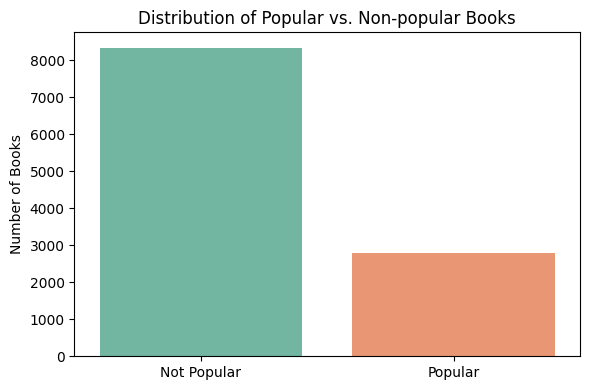

In [29]:
plt.figure(figsize=(6, 4))
sns.countplot(x='is_popular', data=df, palette='Set2')
plt.title("Distribution of Popular vs. Non-popular Books")
plt.xticks([0, 1], ['Not Popular', 'Popular'])
plt.xlabel("")
plt.ylabel("Number of Books")
plt.tight_layout()

plt.show()

##### Rating Distibution

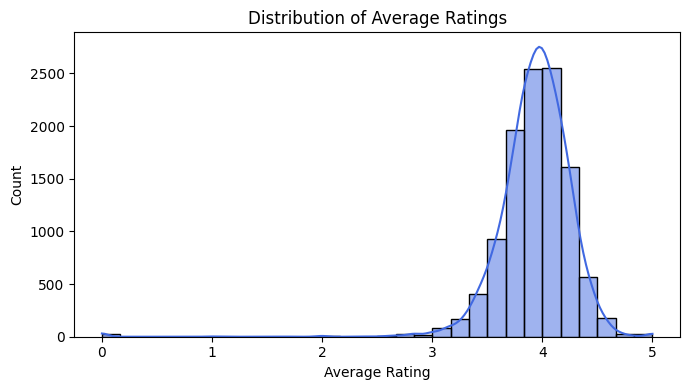

In [30]:
plt.figure(figsize=(7, 4))
sns.histplot(df['average_rating'], bins=30, kde=True, color='royalblue')
plt.title("Distribution of Average Ratings")
plt.xlabel("Average Rating")
plt.tight_layout()
plt.show()

##### Ratings vs Popularity

C:\Users\sakhi\AppData\Local\Temp\ipykernel_13960\2933900619.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_popular', y='average_rating', data=df, palette='Set2')


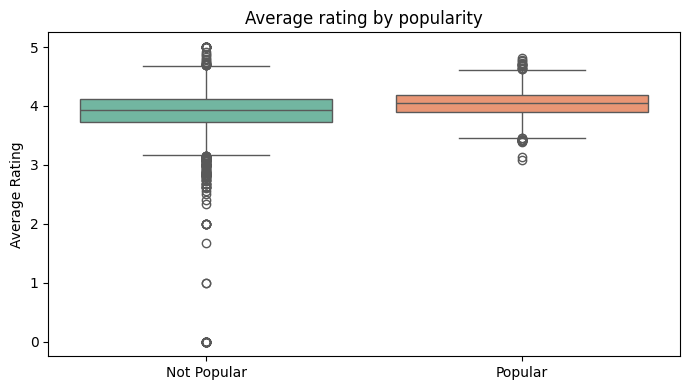

In [31]:
plt.figure(figsize=(7, 4))
sns.boxplot(x='is_popular', y='average_rating', data=df, palette='Set2')
plt.xticks([0, 1], ['Not Popular', 'Popular'])
plt.title("Average rating by popularity")
plt.xlabel("")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()

##### Review Count Matters

C:\Users\sakhi\AppData\Local\Temp\ipykernel_13960\3473565052.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


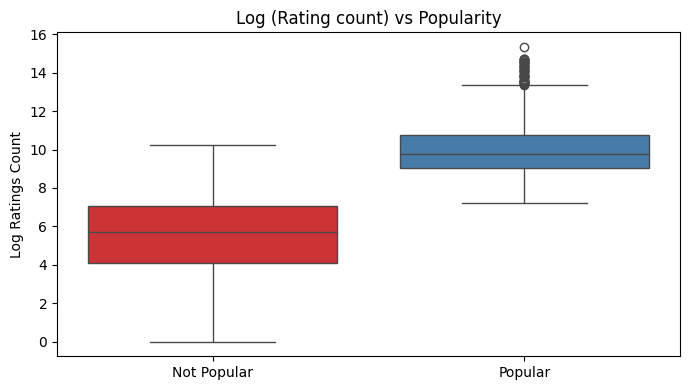

In [32]:
plt.figure(figsize=(7, 4))
sns.boxplot(
    x='is_popular',
    y=np.log1p(df['ratings_count']),
    data=df,
    palette='Set1'
)

plt.xticks([0, 1], ['Not Popular', 'Popular'])
plt.title("Log (Rating count) vs Popularity")
plt.xlabel("")
plt.ylabel("Log Ratings Count")
plt.tight_layout()
plt.show()

##### Text-Based Insights (Word Clouds)

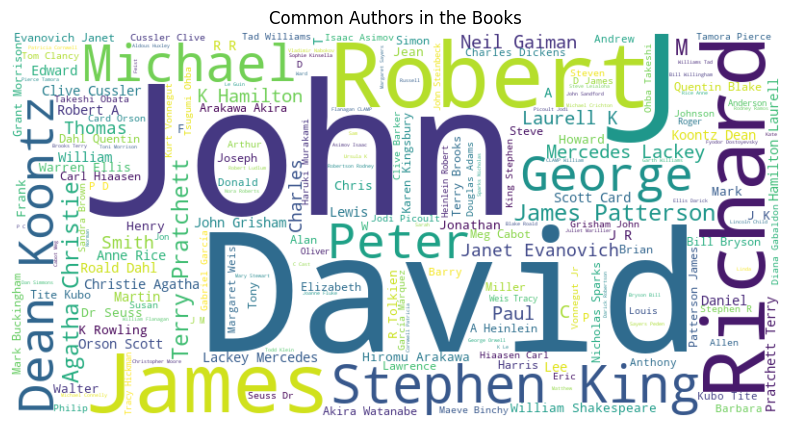

In [33]:
from wordcloud import WordCloud

popular_text = " ".join(
    df[df['is_popular'] == 1]['authors']
)

WordCloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords='english'
).generate(popular_text)

plt.figure(figsize=(10, 5))
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Authors in the Books")
plt.show()

##### Model Evaluation Visuals

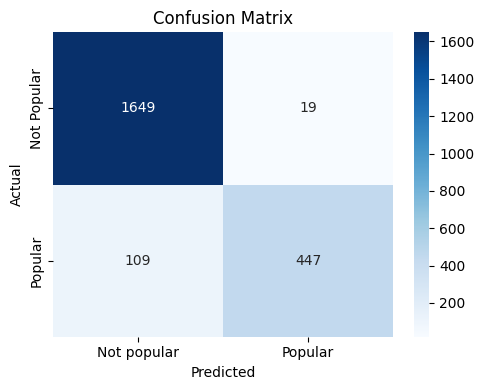

In [34]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not popular', 'Popular'], yticklabels=['Not Popular', 'Popular']
)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

##### ROC curve

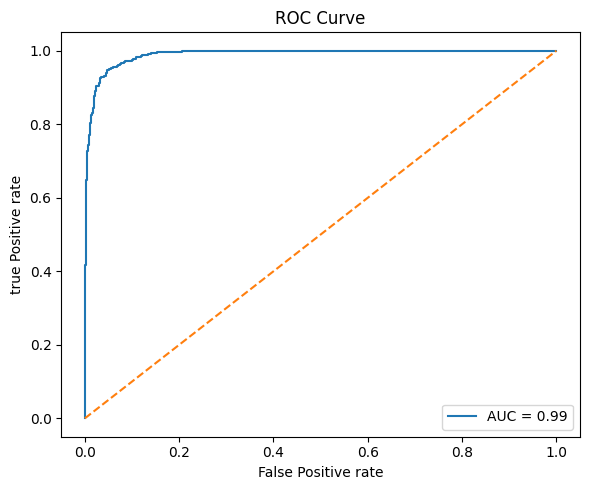

In [36]:
from sklearn.metrics import roc_curve, auc

y_probs = model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_curve = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_curve:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive rate')
plt.ylabel('true Positive rate')
plt.title('ROC Curve')
plt.legend()
plt.tight_layout()
plt.show()